#  Install package

In [1]:
! pip install pyvis
! pip install networkx
! pip install openai

# Import package

In [2]:
!pip install pandas 

In [3]:
!pip install geopandas

In [3]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

In [4]:
import os
import vertexai
from vertexai.generative_models import GenerativeModel

# Define Solution class
Please run the following cell to define the functions

In [5]:
%load_ext autoreload
%autoreload 2

import LLM_Geo_Constants as constants
import helper

from LLM_Geo_kernel import Solution



# Define what the task is and Data Locations 

## Input task and data desciption

In [6]:
isReview = True

In [14]:
import subprocess

script_path = "C:/Users/chait/Downloads/VertiLLM/tree-species-classification-rgb/executable.py"
subprocess.run(["python", script_path], check=True)



CompletedProcess(args=['python', 'C:/Users/chait/Downloads/VertiLLM/tree-species-classification-rgb/executable.py'], returncode=0)

In [7]:

# Demo case where we plot the population living near hazardous waste 

# task_name ='Resident_at_risk_counting'
# TASK = r"""1) Find out Census tracts that contain hazardous waste facilities, then compute and print out the population living in those tracts. The study area is North Carolina (NC), US.
# 2) Generate a population choropleth map for all tract polygons in NC, rendering the color by tract population; and then highlight the borders of tracts that have hazardous waste facilities. Please draw all polygons, not only the highlighted ones. The map size is 15*10 inches.
# """

# DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/HW_Sites_EPSG4326.zip.",
#                   "NC tract boundary shapefile: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_37_EPSG4326.zip. The tract ID column is 'GEOID', data types is integer.",
#                   "NC tract population CSV file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID', data types is integer."
#                  ]

#Case 1: to visualize tree crowns and highlight the trees with poor quality 
task_name ='Tree_crown_quality'

TASK = r"""1) To plot out the tree crown using geoJSON file and highlight the trees that are ash species ('Predicted Tree Species':'Ash') using red. Please draw all polygons, not only the ones with poor condition and belonging to the Ash species. The map size is 15*10
"""

DATA_LOCATIONS = ["Tree crown geoJSON shape file: https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson."]

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
# model = "gemini-1.5-flash-002"
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional Geo-information scientist and programmer good at Python. You have worked on Geographic information science more than 20 years, and know every detail and pitfall when processing spatial data and coding. You know well how to set up workflows for spatial analysis tasks. You have significant experence on graph theory, application, and implementation. You are also experienced on generating map using Matplotlib and GeoPandas.
 

Your task: Generate a graph (data structure) only, whose nodes are (1) a series of consecutive steps and (2) data to solve this question:  
 1) To plot out the tree crown using geoJSON file and highlight the trees that are ash species ('Predicted Tree Species':'Ash') using red. Please draw all polygons, not only the ones with poor condition and belonging to the Ash species. The map size is 15*10
 

Your reply needs to meet these requirements: 
 1. Think step by step.
2. Steps and data (both input and output) fo

## Get graph code from GPT API

In [9]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))


# response_for_graph = solution.get_LLM_response_for_graph()
# solution.save_solution()

# # Load solution
# loaded_solution = load_solution("./task1.pkl")
# print(loaded_solution.task_name)  # Should print "task1"

import networkx as nx

G = nx.DiGraph()

# Node 1: GeoJSON data
G.add_node("geojson_data", node_type="data", data_path="https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson", description="Tree crown GeoJSON data")

# Node 2: Load GeoJSON operation
G.add_node("load_geojson", node_type="operation", description="Load GeoJSON data into GeoDataFrame")
G.add_edge("geojson_data", "load_geojson")

# Node 3: GeoDataFrame
G.add_node("tree_gdf", node_type="data", description="GeoDataFrame containing tree crown data")
G.add_edge("load_geojson", "tree_gdf")

# Node 4: Filter Ash species operation
G.add_node("filter_ash", node_type="operation", description="Filter GeoDataFrame to select only Ash trees")
G.add_edge("tree_gdf", "filter_ash")

# Node 5: Ash trees GeoDataFrame
G.add_node("ash_gdf", node_type="data", description="GeoDataFrame containing only Ash trees")
G.add_edge("filter_ash", "ash_gdf")


# Node 6:  Plot generation operation
G.add_node("generate_plot", node_type="operation", description="Generate the plot using Matplotlib and GeoPandas")
G.add_edge("tree_gdf", "generate_plot")
G.add_edge("ash_gdf", "generate_plot")

# Node 7: Plot output
G.add_node("plot_output", node_type="data", data_path="", description="Generated plot (Matplotlib figure)")
G.add_edge("generate_plot", "plot_output")

#Node 8: Map size
G.add_node("map_size", node_type = "data", data_path = "", description = "Map size: 15x10")
G.add_edge("map_size", "generate_plot")

## Execute code to generate the solution graph

In [10]:
import textwrap
import os

# Step 1: Get the response and save it
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

# Step 2: Normalize the code to fix indentation
try:
    # Normalize the indentation
    normalized_code = textwrap.dedent(solution.code_for_graph)
    
    # Debugging: Print the normalized code
    print("Normalized code for graph:\n", normalized_code)
    
    # Save the normalized code to a temporary file (optional, for debugging)
    debug_file = "debug_ash_generated_code.py"
    with open(debug_file, "w") as f:
        f.write(normalized_code)
    print(f"Normalized code saved to: {os.path.abspath(debug_file)}")
    
    # Step 3: Execute the normalized code
    exec(normalized_code)
except IndentationError as e:
    print(f"IndentationError in generated code: {e}")
except Exception as e:
    print(f"Error executing the generated code: {e}")

Attempt 1: Generating response...

Response:
```python
import networkx as nx

G = nx.DiGraph()

# 1. Load GeoJSON data
G.add_node("geojson_url", node_type="data", data_path="https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson", description="URL to the GeoJSON file containing tree crown data")
G.add_node("load_geojson", node_type="operation", description="Load GeoJSON data into a GeoDataFrame")
G.add_edge("geojson_url", "load_geojson")
G.add_node("tree_gdf", node_type="data", description="GeoDataFrame containing tree crown data")
G.add_edge("load_geojson", "tree_gdf")


# 2. Filter Ash species
G.add_node("filter_ash", node_type="operation", description="Filter GeoDataFrame to select only Ash tree crowns")
G.add_edge("tree_gdf", "filter_ash")
G.add_node("ash_trees_gdf", node_type="data", description="GeoDataFrame containing only Ash tree crowns")
G.add_edge("filter_ash", "ash_trees_gdf")


# 3. Plot the tree crowns
G.add_node("map_fig_siz

In [11]:
file_path = "debug_ash_generated_code.py"

# Read the file content
with open(file_path, "r") as file:
    debugged_code = file.read()

# Store the code into solution.code_for_graph
solution.code_for_graph = debugged_code

exec(solution.code_for_graph)

In [12]:
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# # HTML file should in the same directory. See:
# # https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell

# # html_name

In [13]:
nt.show(name=html_name)

C:\Users\chait\Projects\LLM_Geo_GCP\Tree_crown_quality.html


## Generate prompts and code for operations (functions)

In [14]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd
import matplotlib.pyplot as plt

def load_tree_crown_shp(tree_crown_shp_url='https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson'):
    """Load tree crown shapefile using GeoPandas"""
    try:
        tree_crown_gdf = gpd.read_file(tree_crown_shp_url)
        return tree_crown_gdf
    except Exception as e:
        print(f"Error loading tree crown shapefile: {e}")
        return None
import geopandas as gpd
import pandas as pd

def filter_poor_condition(tree_crown_gdf):
    """Filter GeoDataFrame to select trees with '3-Poor' condition"""
    
    #Drop rows with NaN in 'Condition' column
    tree_crown_gdf = tree_crown_gdf.dropna(subset=['Condition'])
    
    #Filter for '3-Poor' condition
    poor_condition_gdf = tree_crown_gdf[tree_crown_gdf['Condition'] == '3-Poor']
    
    return poor_condition_gdf
import geopandas as gpd
import matplotlib.pyplot as plt

def create_map(tree_crown_gdf, ash_trees_gdf):
    """Create map using Matplotlib and GeoPandas, highlighting poor condition trees"""
    fig, ax = plt.subplots(figsize=(15, 10))
    
    #Check if GeoDataFrames are empty
    if tree_crown_gdf.empty or ash_trees_gdf.empty:
        print("Warning: One or both GeoDataFrames are empty. Cannot create map.")
        return None, None

    # Plot all tree crowns
    tree_crown_gdf.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, label='All Trees')

    # Highlight Ash trees in red
    ash_trees_gdf.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3, label='Ash Trees')

    ax.set_title('Tree Crown Map')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    map_output = fig
    
    return map_output, None
import matplotlib.pyplot as plt

def set_map_size(map_output=None):
    """Set map size to 15x10"""
    if map_output is None:
        print("Warning: map_output is None. Cannot set map size.")
        return None
    
    fig = map_output
    fig.set_size_inches(15, 10)
    return fig

## Generate prompts and code for assembly program

In [15]:
#Rerun this to generate the assembly_prompt
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import requests
import csv
import io

url = "YOUR_CSV_URL_HERE"  # Replace with the actual URL of your CSV file

try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    # Read the CSV data into a list of dictionaries
    reader = csv.DictReader(io.StringIO(response.text))
    data = list(reader)

except requests.exceptions.RequestException as e:
    print(f"An error occurred during the request: {e}")
    data = None  # Or handle the error appropriately
except csv.Error as e:
    print(f"An error occurred during CSV parsing: {e}")
    data = None  # Or handle the error appropriately

#Now 'data' contains the CSV data as a list of dictionaries.  Each dictionary represents a row.
if data:
    print(f"Successfully retrieved {len(data)} rows from the CSV.")
    # Access individual rows and columns:
    # for row in data:
    #     print(row['column_name']) # replace 'column_name' with your actual column header

In [16]:
print(solution.assembly_prompt) 

Your role: A professional Geo-information scientist and programmer good at Python. You have worked on Geographic information science more than 20 years, and know every detail and pitfall when processing spatial data and coding. Your are very good at assembling functions and small programs together. You know how to make programs robust.
 

Your task is: use the given Python functions, return a complete Python program to solve the question: 
 1) To plot out the tree crown using geoJSON file and highlight the trees that are ash species ('Predicted Tree Species':'Ash') using red. Please draw all polygons, not only the ones with poor condition and belonging to the Ash species. The map size is 15*10
Requirement: 
 1. You can think step by step. 
2. Each function is one step to solve the question. 
3. The output of the final function is the question to the question.
4. Put your reply in a code block(enclosed by ```python and ```), NO explanation or conversation outside the code block.
5. Save

In [32]:
# print(solution.assembly_LLM_response)

In [113]:
# assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
# solution.assembly_LLM_response = assembly_LLM_response
# solution.save_solution()

# clear_output(wait=True)
# display(Code(solution.code_for_assembly, language='python'))

In [17]:
import vertexai
from vertexai.generative_models import GenerativeModel

# TODO(developer): Update and un-comment below line
PROJECT_ID = "llmgis"
vertexai.init(project=PROJECT_ID, location="us-central1")

model = GenerativeModel("gemini-1.5-flash-002")

response = model.generate_content(
    solution.assembly_prompt
)

print(response.text)


```python
import geopandas as gpd
import matplotlib.pyplot as plt

def load_tree_crown_shp(tree_crown_shp_url='https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson'):
    """Load tree crown shapefile using GeoPandas"""
    try:
        tree_crown_gdf = gpd.read_file(tree_crown_shp_url)
        return tree_crown_gdf
    except Exception as e:
        print(f"Error loading tree crown shapefile: {e}")
        return None

def filter_ash_trees(tree_crown_gdf):
    """Filter GeoDataFrame to select ash trees"""
    if tree_crown_gdf is None:
        return None
    try:
        ash_trees_gdf = tree_crown_gdf[tree_crown_gdf['Predicted Tree Species'] == 'Ash']
        return ash_trees_gdf
    except KeyError:
        print("Error: 'Predicted Tree Species' column not found in GeoDataFrame.")
        return None

import geopandas as gpd
import matplotlib.pyplot as plt

def create_map(tree_crown_gdf, ash_trees_gdf):
    """Create map using Matplotl

In [18]:
code_for_assembly = helper.extract_code(response.text)

Debug: Response object type: <class 'str'>
Debug: Response content: ```python
import geopandas as gpd
import matplotlib.pyplot as plt

def load_tree_crown_shp(tree_crown_shp_url='https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson'):
    """Load tree crown shapefile using GeoPandas"""
    try:
        tree_crown_gdf = gpd.read_file(tree_crown_shp_url)
        return tree_crown_gdf
    except Exception as e:
        print(f"Error loading tree crown shapefile: {e}")
        return None

def filter_ash_trees(tree_crown_gdf):
    """Filter GeoDataFrame to select ash trees"""
    if tree_crown_gdf is None:
        return None
    try:
        ash_trees_gdf = tree_crown_gdf[tree_crown_gdf['Predicted Tree Species'] == 'Ash']
        return ash_trees_gdf
    except KeyError:
        print("Error: 'Predicted Tree Species' column not found in GeoDataFrame.")
        return None

import geopandas as gpd
import matplotlib.pyplot as plt

def create_

In [19]:
 code_for_assembly

'import geopandas as gpd\nimport matplotlib.pyplot as plt\n\ndef load_tree_crown_shp(tree_crown_shp_url=\'https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson\'):\n    """Load tree crown shapefile using GeoPandas"""\n    try:\n        tree_crown_gdf = gpd.read_file(tree_crown_shp_url)\n        return tree_crown_gdf\n    except Exception as e:\n        print(f"Error loading tree crown shapefile: {e}")\n        return None\n\ndef filter_ash_trees(tree_crown_gdf):\n    """Filter GeoDataFrame to select ash trees"""\n    if tree_crown_gdf is None:\n        return None\n    try:\n        ash_trees_gdf = tree_crown_gdf[tree_crown_gdf[\'Predicted Tree Species\'] == \'Ash\']\n        return ash_trees_gdf\n    except KeyError:\n        print("Error: \'Predicted Tree Species\' column not found in GeoDataFrame.")\n        return None\n\nimport geopandas as gpd\nimport matplotlib.pyplot as plt\n\ndef create_map(tree_crown_gdf, ash_trees_gdf):\n    ""

In [20]:
all_code = all_operation_code_str + '\n' + code_for_assembly +  '\n' + 'assembely_solution()'

display(Code(all_code, language='python'))

import geopandas as gpd
import matplotlib.pyplot as plt

def load_tree_crown_shp(tree_crown_shp_url='https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson'):
    """Load tree crown shapefile using GeoPandas"""
    try:
        tree_crown_gdf = gpd.read_file(tree_crown_shp_url)
        return tree_crown_gdf
    except Exception as e:
        print(f"Error loading tree crown shapefile: {e}")
        return None
import geopandas as gpd
import pandas as pd

def filter_poor_condition(tree_crown_gdf):
    """Filter GeoDataFrame to select trees with '3-Poor' condition"""
    
    #Drop rows with NaN in 'Condition' column
    tree_crown_gdf = tree_crown_gdf.dropna(subset=['Condition'])
    
    #Filter for '3-Poor' condition
    poor_condition_gdf = tree_crown_gdf[tree_crown_gdf['Condition'] == '3-Poor']
    
    return poor_condition_gdf
import geopandas as gpd
import matplotlib.pyplot as plt

def create_map(tree_crown_gdf, ash_trees_gdf):
    """Create map using Matplotlib and GeoPandas, highlighting poor condition trees"""
    fig, ax = plt.subplots(figsize=(15, 10))
    
    #Check if GeoDataFrames are empty
    if tree_crown_gdf.empty or ash_trees_gdf.empty:
        print("Warning: One or both GeoDataFrames are empty. Cannot create map.")
        return None, None

    # Plot all tree crowns
    tree_crown_gdf.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, label='All Trees')

    # Highlight Ash trees in red
    ash_trees_gdf.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3, label='Ash Trees')

    ax.set_title('Tree Crown Map')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    map_output = fig
    
    return map_output, None
import matplotlib.pyplot as plt

def set_map_size(map_output=None):
    """Set map size to 15x10"""
    if map_output is None:
        print("Warning: map_output is None. Cannot set map size.")
        return None
    
    fig = map_output
    fig.set_size_inches(15, 10)
    return fig
import geopandas as gpd
import matplotlib.pyplot as plt

def load_tree_crown_shp(tree_crown_shp_url='https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson'):
    """Load tree crown shapefile using GeoPandas"""
    try:
        tree_crown_gdf = gpd.read_file(tree_crown_shp_url)
        return tree_crown_gdf
    except Exception as e:
        print(f"Error loading tree crown shapefile: {e}")
        return None

def filter_ash_trees(tree_crown_gdf):
    """Filter GeoDataFrame to select ash trees"""
    if tree_crown_gdf is None:
        return None
    try:
        ash_trees_gdf = tree_crown_gdf[tree_crown_gdf['Predicted Tree Species'] == 'Ash']
        return ash_trees_gdf
    except KeyError:
        print("Error: 'Predicted Tree Species' column not found in GeoDataFrame.")
        return None

import geopandas as gpd
import matplotlib.pyplot as plt

def create_map(tree_crown_gdf, ash_trees_gdf):
    """Create map using Matplotlib and GeoPandas, highlighting poor condition trees"""
    fig, ax = plt.subplots(figsize=(15, 10))
    
    #Check if GeoDataFrames are empty
    if tree_crown_gdf is None or ash_trees_gdf is None or tree_crown_gdf.empty or ash_trees_gdf.empty:
        print("Warning: One or both GeoDataFrames are empty. Cannot create map.")
        return None, None

    # Plot all tree crowns
    tree_crown_gdf.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3, label='All Trees')

    # Highlight Ash trees in red
    ash_trees_gdf.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3, label='Ash Trees')

    ax.set_title('Tree Crown Map')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    map_output = fig
    
    return map_output, None

def save_map(map_output):
    if map_output is not None:
      map_output.savefig('tree_crown_map.png')
      return 'tree_crown_map.png'
    else:
      return None


def assembel

In [21]:
all_code = """
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def load_geojson(geojson_url='https://raw.githubusercontent.com/pchaitanya21/VertinetikLLM/main/data/Hicks_Lodge_Trial_pred.geojson'):
    #Load GeoJSON data into a GeoDataFrame.
    try:
        tree_gdf = gpd.read_file(geojson_url)
        return tree_gdf
    except Exception as e:
        print(f"An error occurred while loading the GeoJSON file: {e}")
        return None

def filter_ash(tree_gdf=None):
    #Filter GeoDataFrame to select only Ash trees ('Predicted Tree Species':'Ash').
    if tree_gdf is None:
        return None

    tree_gdf = tree_gdf.dropna(subset=['Predicted Tree Species'])
    ash_trees_gdf = tree_gdf[tree_gdf['Predicted Tree Species'] == 'Ash']
    return ash_trees_gdf

import geopandas as gpd
import matplotlib.pyplot as plt

def create_map(tree_gdf=None, ash_trees_gdf=None):
    #Create a map using Matplotlib and GeoPandas, highlighting Ash trees in red.
    if tree_gdf is None or ash_trees_gdf is None:
        return None

    fig, ax = plt.subplots(figsize=(15, 10))

    tree_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.2)
    ash_trees_gdf.plot(ax=ax, color='red', edgecolor='black', linewidth=0.2, label='Ash Trees')

    ax.set_title('Tree Crown Map')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    map_figure = fig
    plt.savefig('tree_crown_map.png')
    return map_figure

import matplotlib.pyplot as plt

def set_map_size(map_figure=None):
    #Set the figure size of the map to 15x10 inches.
    if map_figure is None:
        return None
    
    fig = map_figure
    fig.set_size_inches(15, 10)
    sized_map_figure = fig
    return sized_map_figure

def assembely_solution():
    tree_gdf = load_geojson()
    if tree_gdf is None:
        return None
    ash_trees_gdf = filter_ash(tree_gdf)
    if ash_trees_gdf is None:
        return None
    map_figure = create_map(tree_gdf, ash_trees_gdf)
    if map_figure is None:
        return None
    final_map = set_map_size(map_figure)
    return final_map

assembely_solution()
   
"""



In [ ]:
#THE LLM Debugging deviates from the original purpose of the prompt and outputs a read csv function which needs to be fixed!



-------------- Running code (trial # 1/10) --------------




Complete program:40: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
Complete program:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




--------------- Done ---------------




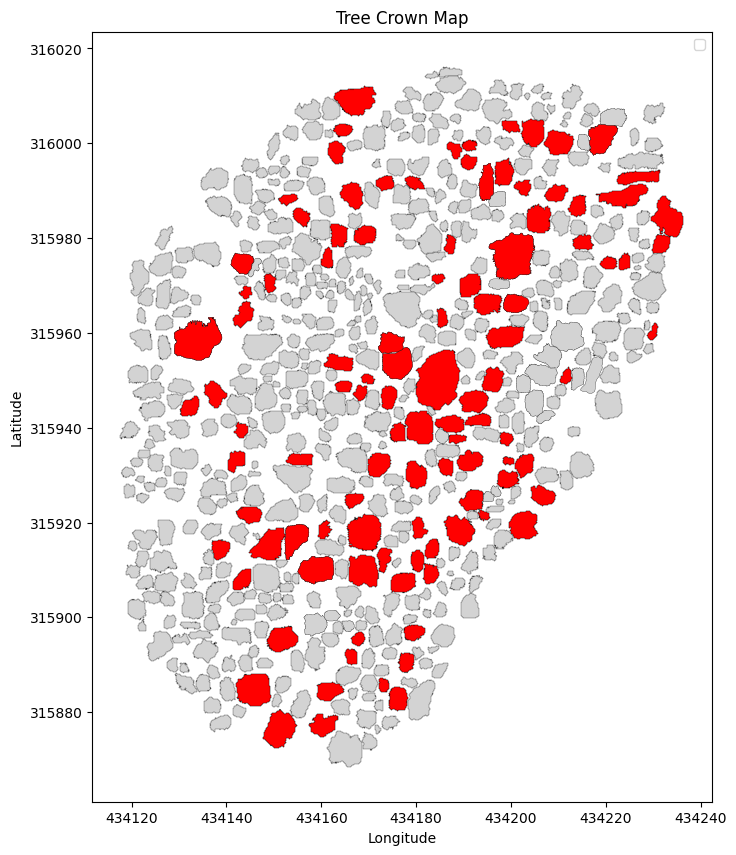

In [22]:
output=solution.execute_complete_program(code=all_code, try_cnt=10)

## Execute assembly code

In [115]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))

all_code = solution.execute_complete_program(code=all_code, try_cnt=10)